<a href="https://colab.research.google.com/github/aMotevallian/gds/blob/main/GDS_Final_project_atenaMotevalian_99243063.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this notebook is for the GDS course final project

name: atena motevalian


student id : 99243063

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [16]:
data = pd.read_csv('/content/drive/MyDrive/gds/credit-g.csv')

In [5]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [6]:
target_variable = "class"

**making distinction between categorical and numericals**

In [17]:
categorical_features = data.select_dtypes(include=["object"]).columns.tolist()

numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

**the ordinal features are saving status and checking status and emplyment**

In [9]:
print(data['savings_status'].unique())

['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']


In [10]:
print(data['checking_status'].unique())

['<0' '0<=X<200' 'no checking' '>=200']


In [11]:
print(data['employment'].unique())

['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']


In [18]:
ordinal_categorical_features = ['employment', 'checking_status', 'savings_status']

In [19]:
savings_status_mapping = {'no known savings': 0,
                          '<100': 1,
                          '100<=X<500':2,
                          '500<=X<1000': 3,
                          '>=1000': 4}
checking_status_mapping = {'no checking': 0,
                           '<0': 1,
                           '0<=X<200': 2,
                           '>=200': 3}
employment_mapping = {'unemployed': 0,
                               '<1': 1,
                               '1<=X<4': 2,
                               '4<=X<7': 3,
                               '>=7': 4}

data['savings_status'] = data['savings_status'].map(savings_status_mapping)
data['checking_status'] = data['checking_status'].map(checking_status_mapping)
data['employment'] = data['employment'].map(employment_mapping)

In [20]:
data['savings_status']

0      0
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    2
Name: savings_status, Length: 1000, dtype: int64

**numercal relation to target var**

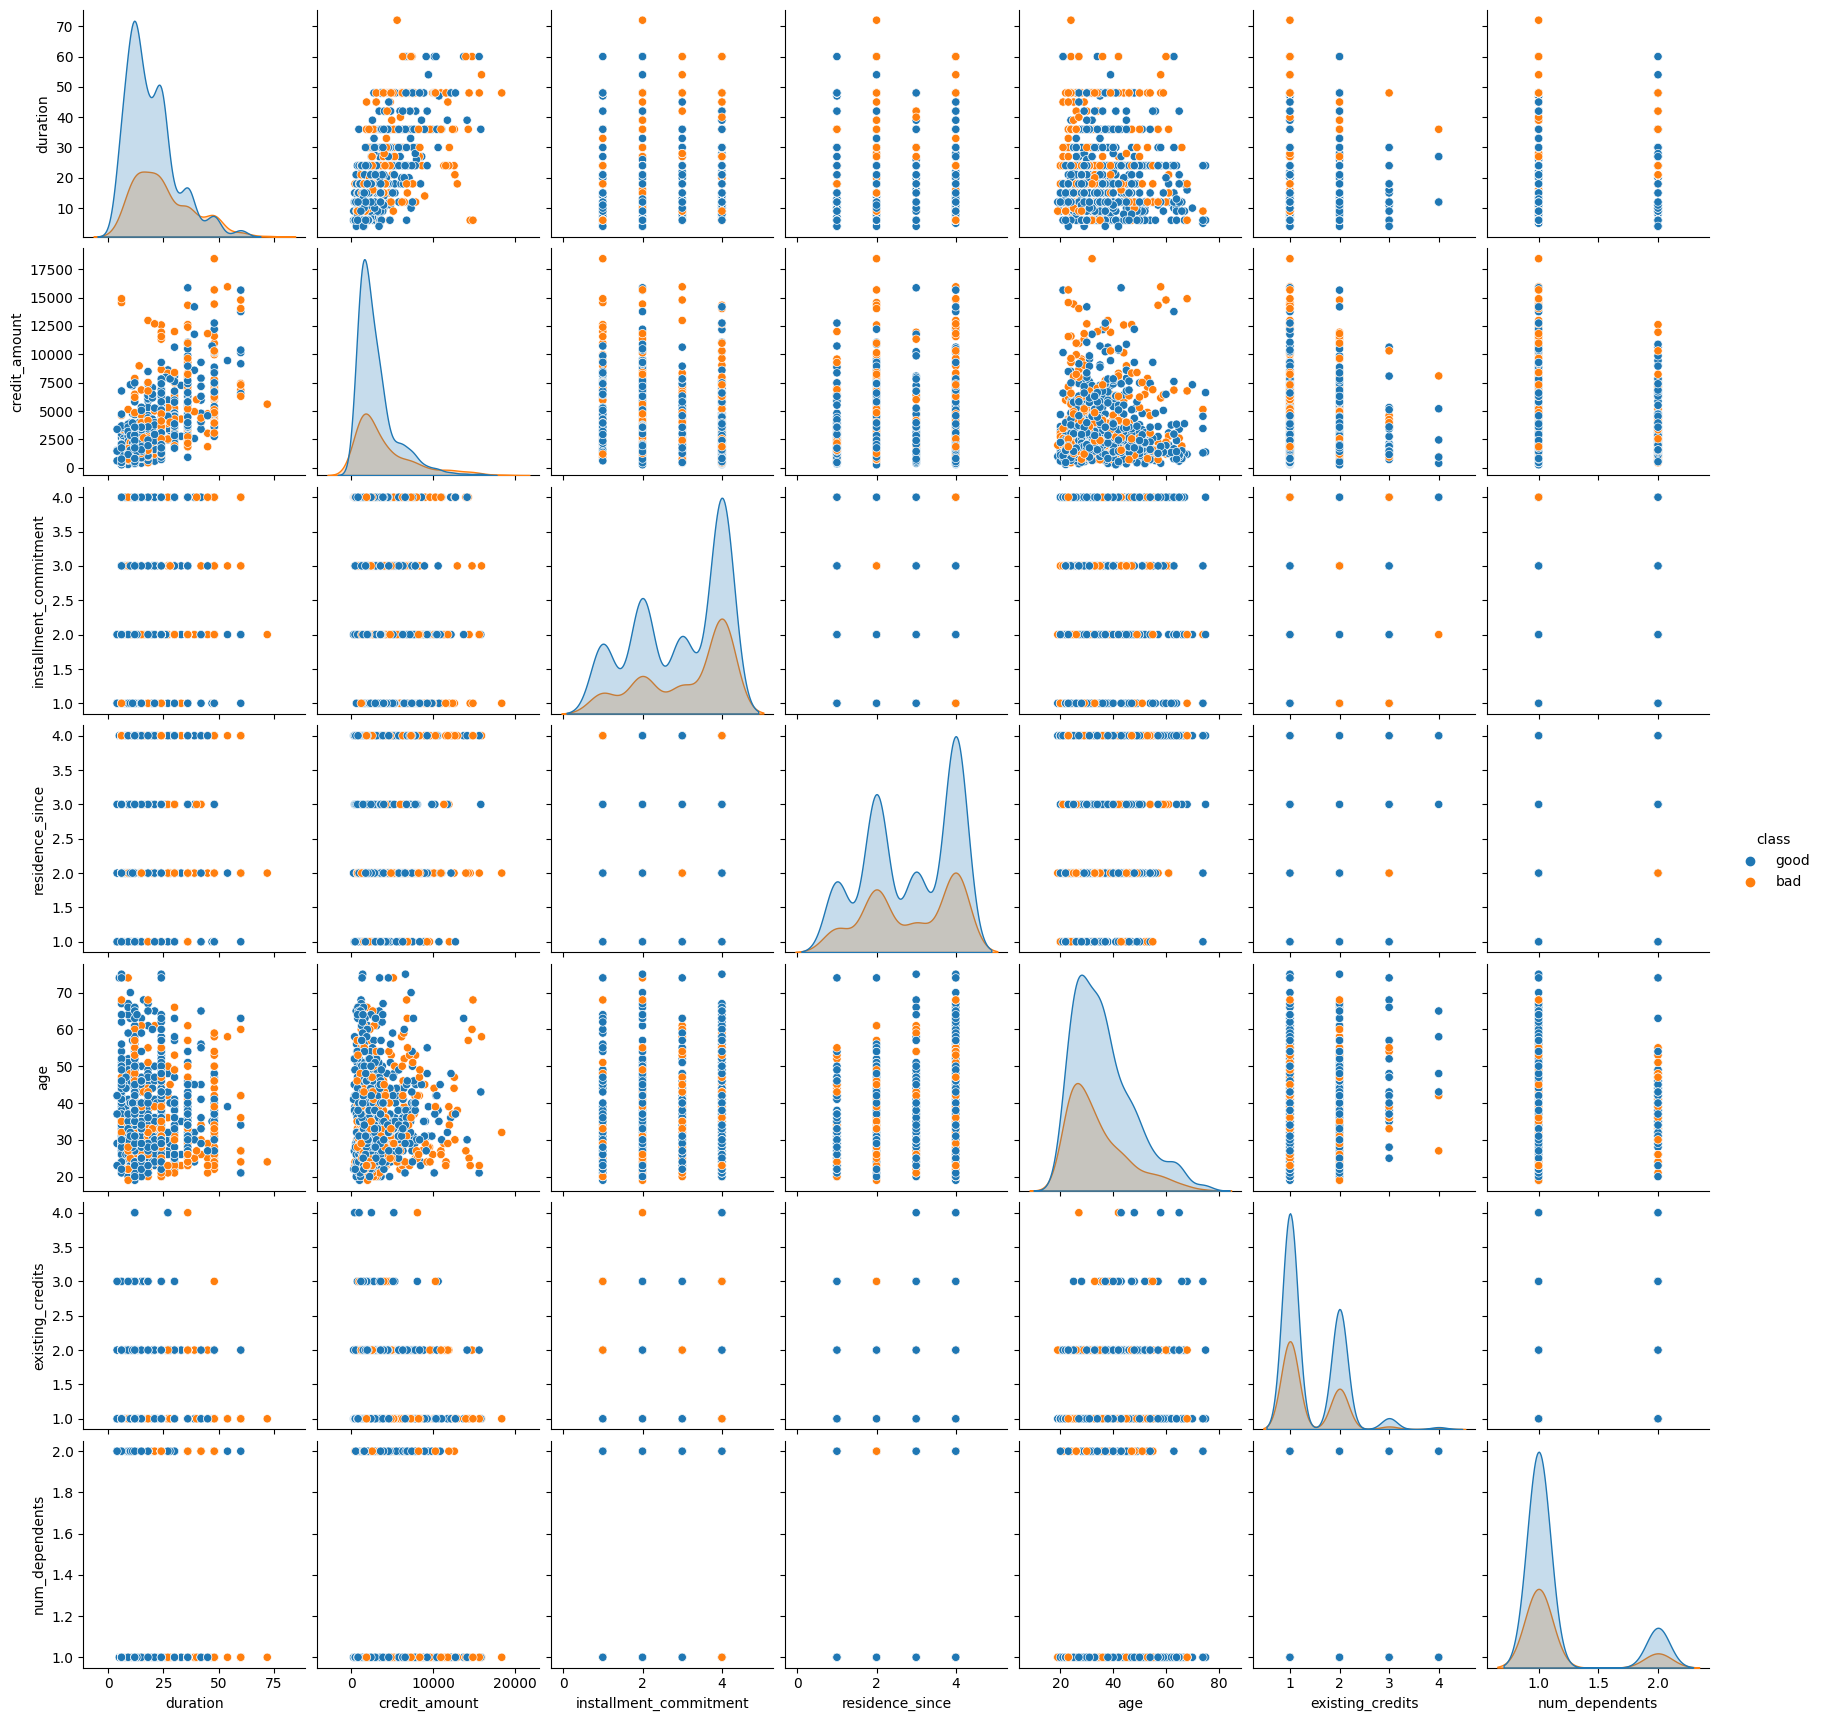

In [21]:
numerical_data = data[numerical_features + [target_variable]]
sns.pairplot(numerical_data, hue=target_variable)
plt.show()

**ordianl relation to target var**

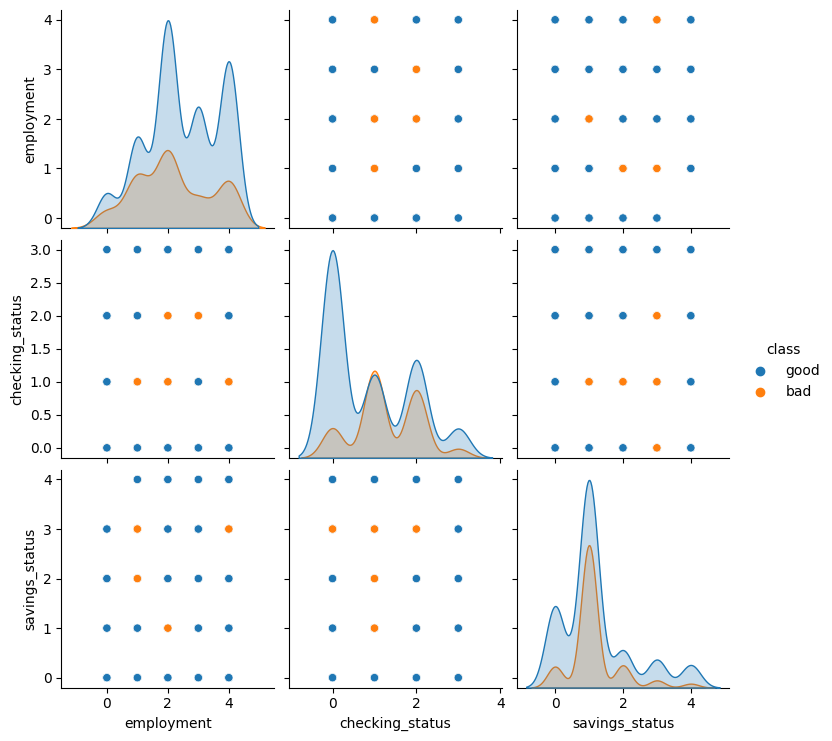

In [22]:
od = data[ordinal_categorical_features + [target_variable]]
sns.pairplot(od, hue=target_variable)
plt.show()

**PCA visualization**

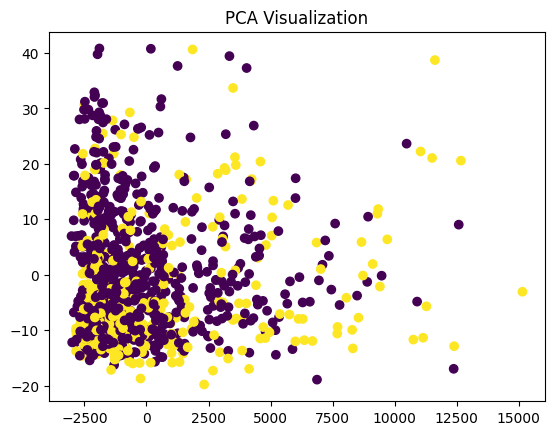

In [23]:
data['class'] = data['class'].map({'good': 0, 'bad': 1})

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data[numerical_features])

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['class'])
plt.title('PCA Visualization')
plt.show()

**checking the relationship of each feature to target variable**

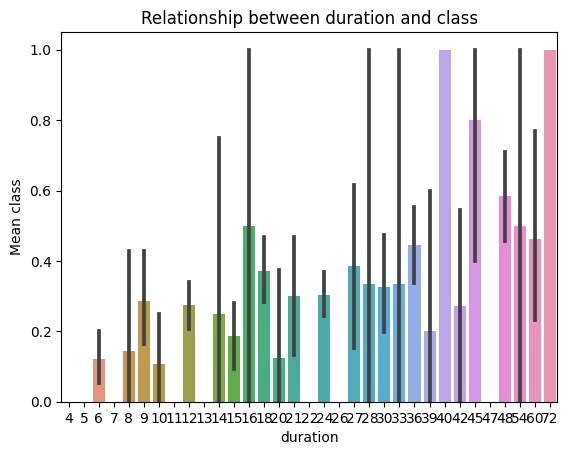

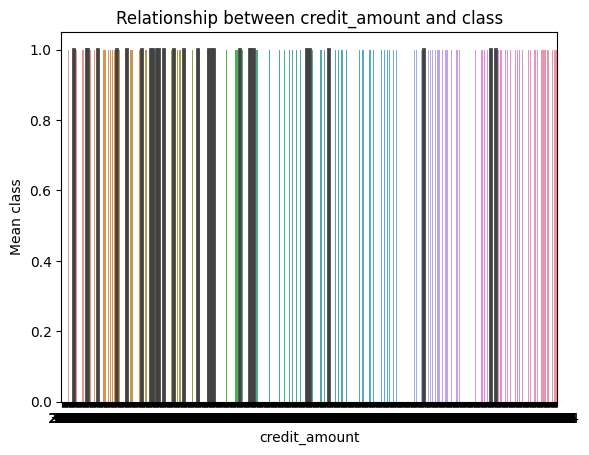

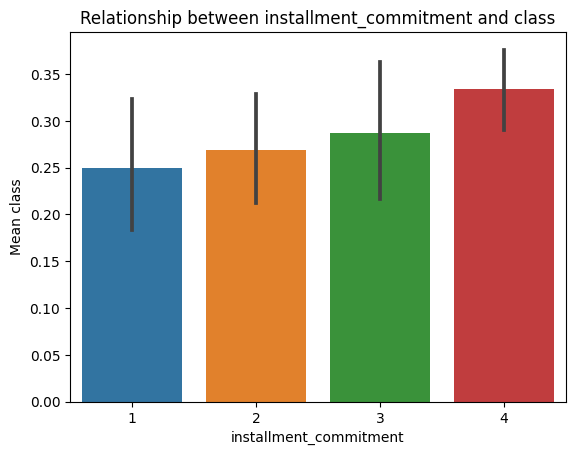

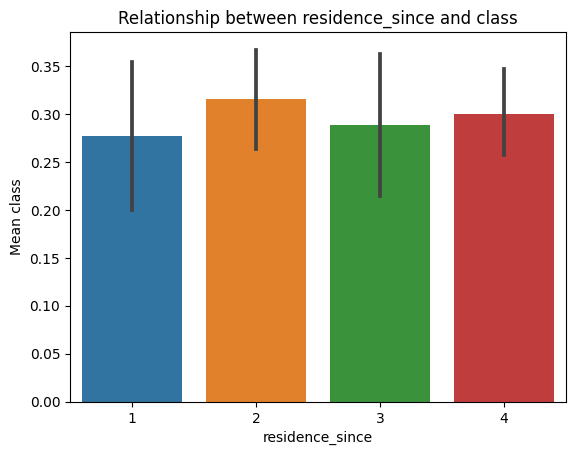

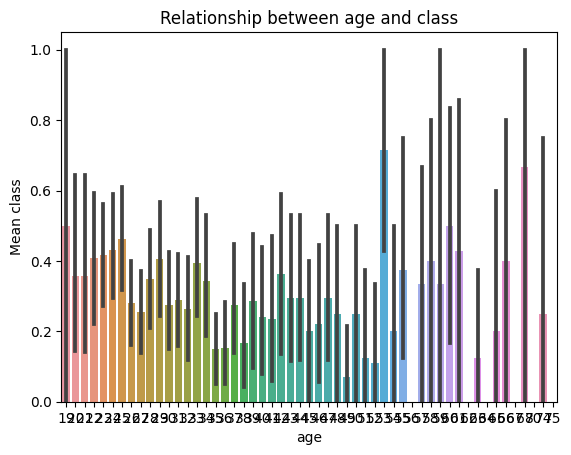

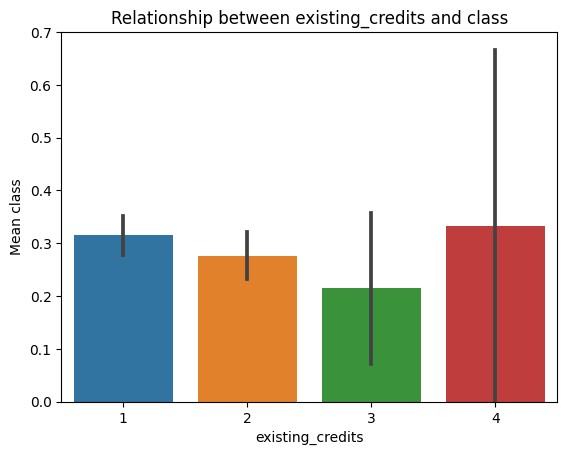

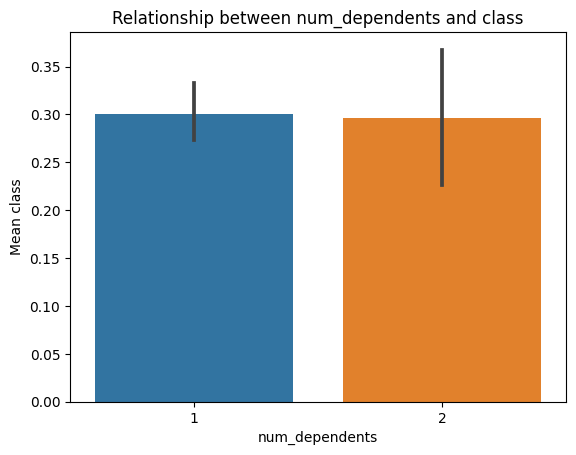

In [24]:
for feature in numerical_features:
    sns.barplot(x=data[feature], y=data[target_variable])
    plt.xlabel(feature)
    plt.ylabel('Mean ' + target_variable)
    plt.title('Relationship between ' + feature + ' and ' + target_variable)
    plt.show()

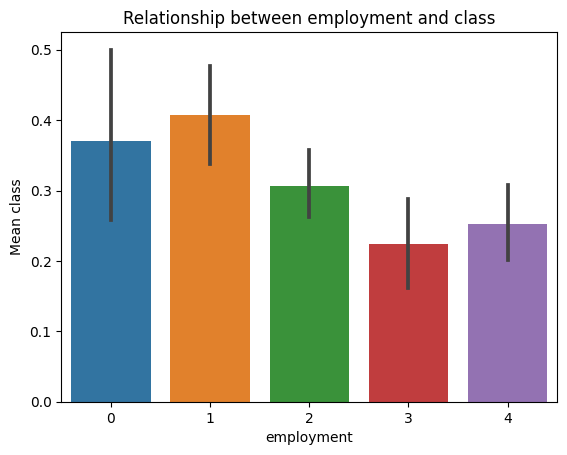

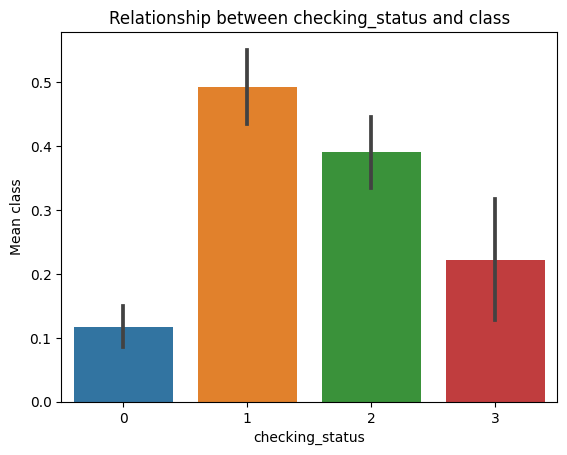

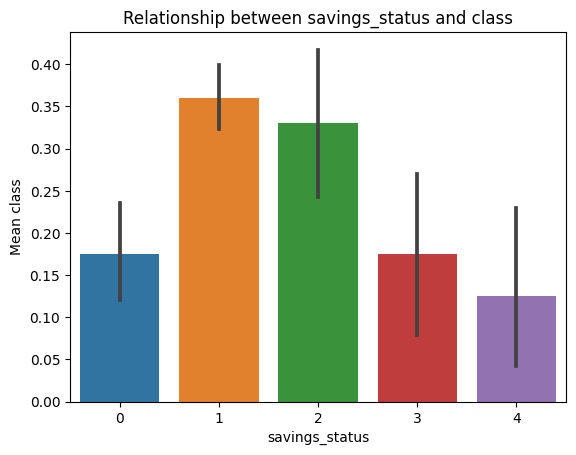

In [25]:
for feature in ordinal_categorical_features:
    sns.barplot(x=data[feature], y=data[target_variable])
    plt.xlabel(feature)
    plt.ylabel('Mean ' + target_variable)
    plt.title('Relationship between ' + feature + ' and ' + target_variable)
    plt.show()

In [26]:
numeric_ordinal_data = data[numerical_features + ordinal_categorical_features]

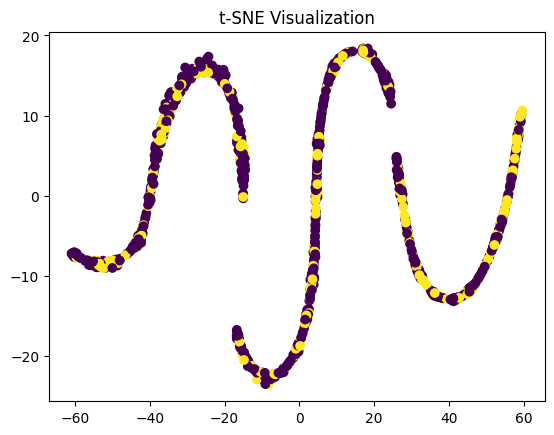

In [27]:
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(numeric_ordinal_data)

plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=data['class'])

plt.title('t-SNE Visualization')
plt.show()


**Splitting the data set**

In [55]:
x = data.drop(columns=['class'] , axis=1)
y = data['class']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Preprocess variables**

In [58]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numerical_features),
    ('categorical', categorical_transformer, ['credit_history','purpose', 'personal_status','other_parties','property_magnitude',
                                              'housing','job','own_telephone']),
    ('ordinal', ordinal_transformer,  ['employment', 'checking_status', 'savings_status'])
])

**Grid search for classifiers**

In [57]:
preprocessor.fit(X_train)

X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [59]:
classifiers = [
    ('logistic_lasso', LogisticRegression(penalty='l1', solver='liblinear', random_state=42)),
    ('logistic_ridge', LogisticRegression(penalty='l2', random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svm', SVC(random_state=42))
]

param_grids = {
    'logistic_lasso': {
        'classifier__C': [0.1, 1, 10],
        'classifier__max_iter': [100, 200, 300]
    },
    'logistic_ridge': {
        'classifier__C': [0.1, 1, 10],
        'classifier__max_iter': [100, 200, 300]
    },
    'random_forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10]
    },
    'svm': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}


In [60]:
results_df = pd.DataFrame(columns=['Classifier', 'Params', 'Accuracy', 'Precision', 'Recall', 'F1'])

<ipython-input-61-deefc9f12218>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


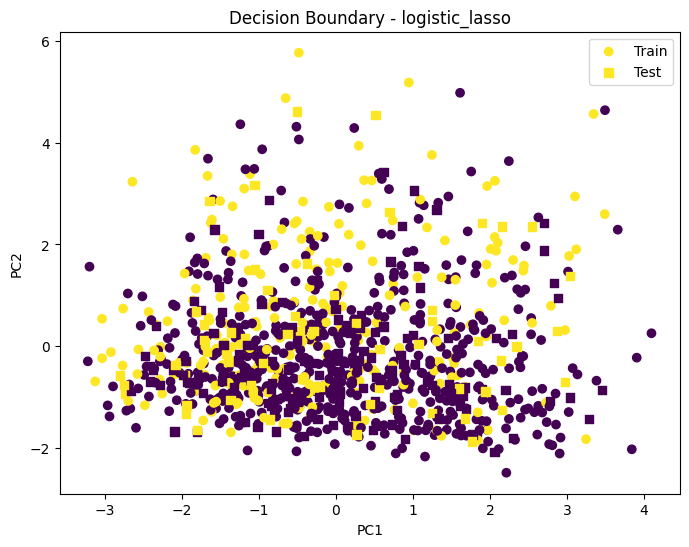

Classifier: logistic_lasso
Best Parameters: {'classifier__C': 10, 'classifier__max_iter': 100}
Accuracy: 0.7350
Precision: 0.5833
Recall: 0.3559
F1: 0.4421
Confusion Matrix:
[[126  15]
 [ 38  21]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

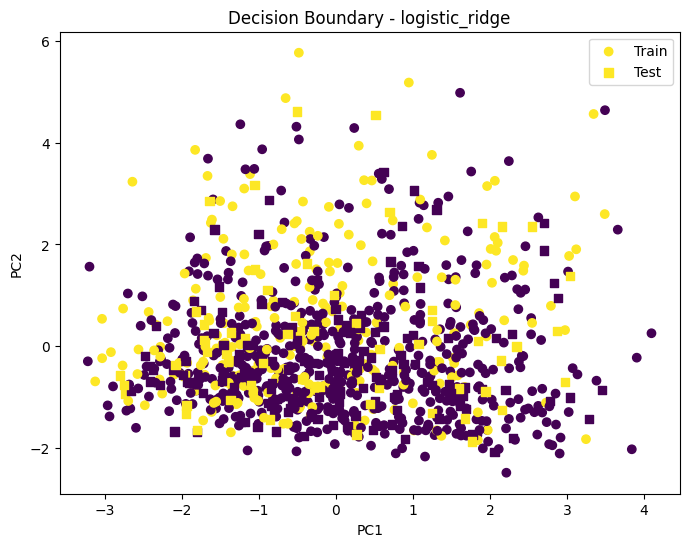

Classifier: logistic_ridge
Best Parameters: {'classifier__C': 10, 'classifier__max_iter': 100}
Accuracy: 0.7350
Precision: 0.5833
Recall: 0.3559
F1: 0.4421
Confusion Matrix:
[[126  15]
 [ 38  21]]


<ipython-input-61-deefc9f12218>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


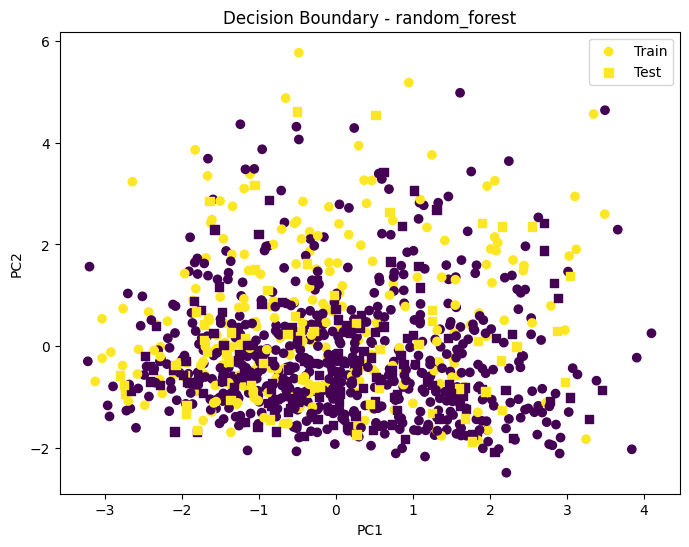

Classifier: random_forest
Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 300}
Accuracy: 0.7500
Precision: 0.6552
Recall: 0.3220
F1: 0.4318
Confusion Matrix:
[[131  10]
 [ 40  19]]


<ipython-input-61-deefc9f12218>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


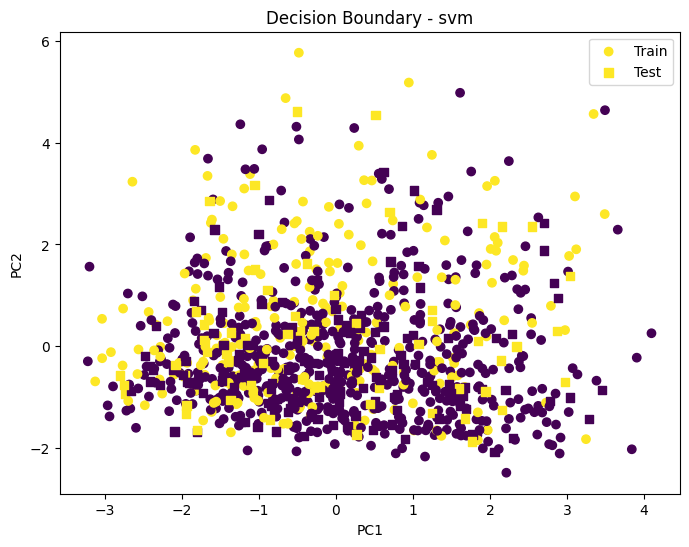

Classifier: svm
Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'linear'}
Accuracy: 0.7400
Precision: 0.6129
Recall: 0.3220
F1: 0.4222
Confusion Matrix:
[[129  12]
 [ 40  19]]


In [61]:
for clf_name, clf in classifiers:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    param_grid = param_grids[clf_name]

    grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_df = results_df.append({
        'Classifier': clf_name,
        'Params': best_params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }, ignore_index=True)

    #3a: Plot decision boundary over the first two Principal Components (PCs)
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_preprocessed)
    X_test_pca = pca.transform(X_test_preprocessed)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Train')
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='s', label='Test')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Decision Boundary - {clf_name}')
    plt.legend()
    plt.show()

    #3b: Report scores and confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f'Classifier: {clf_name}')
    print(f'Best Parameters: {best_params}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1: {f1:.4f}')
    print('Confusion Matrix:')
    print(confusion_mat)

In [62]:
results_df

,Classifier,Params,Accuracy,Precision,Recall,F1
0,logistic_lasso,"{'classifier__C': 10, 'classifier__max_iter': ...",0.735,0.583333,0.355932,0.442105
1,logistic_ridge,"{'classifier__C': 10, 'classifier__max_iter': ...",0.735,0.583333,0.355932,0.442105
2,random_forest,"{'classifier__max_depth': None, 'classifier__n...",0.750,0.655172,0.322034,0.431818
3,svm,"{'classifier__C': 10, 'classifier__kernel': 'l...",0.740,0.612903,0.322034,0.422222
